In [156]:
# Import the libraries
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## Import data

In [157]:
#13k top spotify songs 
#df=pd.read_csv('data/df.csv', sep=",")
#users favorite tracks based on time 
df_fav=pd.read_csv('data/df_fav.csv', sep=",")
df=pd.read_csv('data/df_hot.csv', sep=",")

In [159]:
df.describe()

,length,artists,album,time_signature,danceability,acousticness,energy,tempo,instrumentalness,loudness,liveness,key,valence,speechiness,mode,Popularity,minutes,favorite
count,1.259400e+04,12594.000000,12594.000000,12594.000000,12594.000000,12594.000000,12594.000000,12594.000000,12594.000000,12594.000000,12594.000000,12594.000000,12594.000000,12594.000000,12594.000000,12594.000000,12594.000000,12594.000000
mean,2.385551e+05,4135.184215,4870.247816,4.502938,0.553316,0.315991,0.592348,119.010716,0.182240,-9.627065,0.183178,6.463719,0.469516,0.084973,0.672622,50.297933,3.975918,0.009370
std,1.263497e+05,2385.110827,2834.519720,6.384068,0.189292,0.361614,0.283803,31.161578,0.322545,6.945035,0.148547,12.668640,0.428565,0.110423,0.684204,19.924747,2.105828,0.096346
min,9.750000e+03,0.000000,0.000000,0.000000,0.000000,0.000001,0.000568,0.000000,0.000000,-44.150000,0.012000,0.000000,0.000000,0.000000,0.000000,0.000000,0.162500,0.000000
25%,1.771040e+05,2094.250000,2406.000000,4.000000,0.428000,0.016200,0.413000,97.484000,0.000000,-10.962500,0.094100,2.000000,0.219000,0.036700,0.000000,39.000000,2.951733,0.000000
50%,2.119465e+05,4201.500000,4908.500000,4.000000,0.571000,0.128000,0.655000,121.940000,0.000332,-7.214500,0.122000,5.000000,0.423000,0.047400,1.000000,52.000000,3.532442,0.000000
75%,2.592970e+05,6213.750000,7320.750000,4.000000,0.693000,0.606750,0.827000,137.689500,0.180000,-5.198000,0.225000,9.000000,0.644000,0.079600,1.000000,65.000000,4.321617,0.000000
max,4.170227e+06,8136.000000,9764.000000,96.000000,0.978000,0.996000,0.999000,219.446000,0.986000,1.177000,0.985000,180.917000,5.000000,1.000000,11.000000,100.000000,69.503783,1.000000


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12594 entries, 0 to 12593
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          12594 non-null  object 
 1   length            12594 non-null  int64  
 2   artists           12594 non-null  int64  
 3   album             12594 non-null  int64  
 4   time_signature    12594 non-null  int64  
 5   danceability      12594 non-null  float64
 6   acousticness      12594 non-null  float64
 7   energy            12594 non-null  float64
 8   tempo             12594 non-null  float64
 9   instrumentalness  12594 non-null  float64
 10  loudness          12594 non-null  float64
 11  liveness          12594 non-null  float64
 12  key               12594 non-null  float64
 13  valence           12594 non-null  float64
 14  speechiness       12594 non-null  float64
 15  mode              12594 non-null  int64  
 16  Popularity        12594 non-null  float6

In [161]:
df['favorite'].value_counts()

favorite
0    12476
1      118
Name: count, dtype: int64

In [163]:
print(df.shape)

(12594, 19)


In [164]:
X = df[['artists', 'key', 'valence', 'time_signature', 'tempo', 'mode']]


y = df[['favorite']] 

In [165]:
print(X.shape)
print(y.shape)

(12594, 6)
(12594, 1)


Train & Testing data set 

In [167]:
# Shuffle your dataset 
shuffle_df = df.sample(frac=1)
# Split into training and test set 
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42) 


#X_test = np.ravel(X_test)
#y_test = np.ravel(y_test)

print(y_train.shape)
print(y_test.shape)

(10075, 1)
(2519, 1)


In [168]:
X_train.head(3)

,artists,key,valence,time_signature,tempo,mode
3470,747,2.0,0.190,4,77.079,0
2619,629,7.0,0.338,4,125.012,0
6918,8018,9.0,0.772,4,139.976,1


##### fix the imbalanced data set 

In [169]:
from imblearn.over_sampling import SMOTE
# Train / Split Data
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X, y) 

In [170]:
y_train.value_counts()

favorite
0           12476
1           12476
Name: count, dtype: int64

In [185]:
y_test.value_counts()

favorite
0           2499
1             20
Name: count, dtype: int64

## ML Algo

In [171]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score

# Logistic Regression
lr = LogisticRegression(solver='lbfgs', max_iter=400)
lr.fit(X_train, np.ravel(y_train, order='C'))

lr_scores = cross_val_score(lr, X_train, np.ravel(y_train), cv=10, scoring="f1")
print(np.mean(lr_scores))


1.0


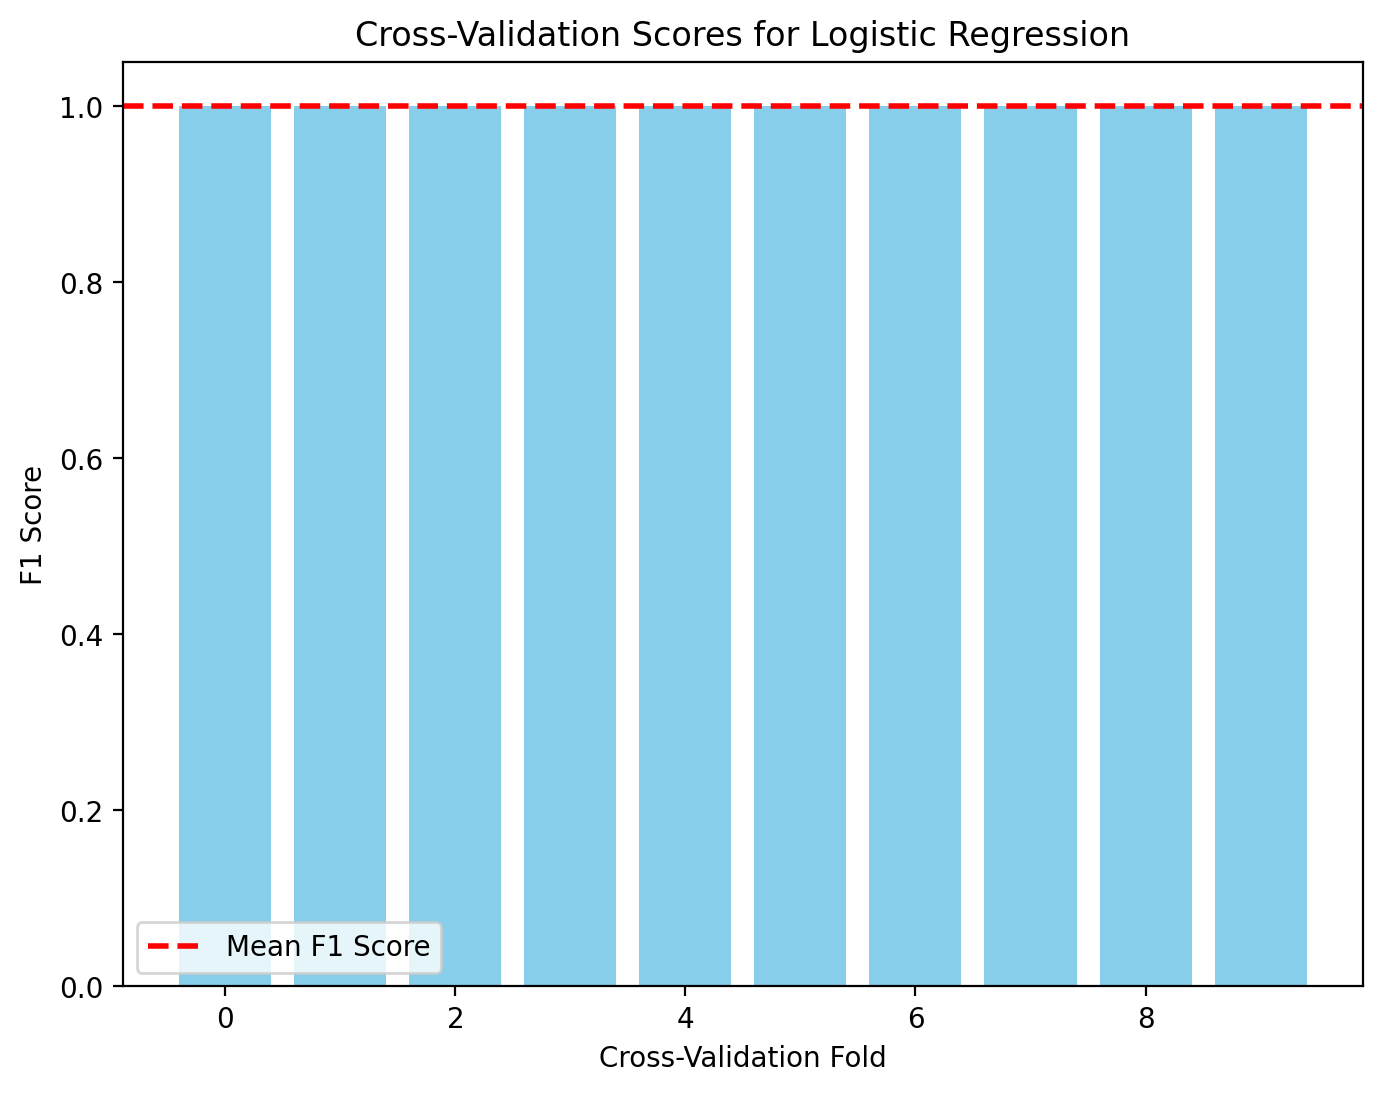

In [191]:
# Plotting the cross-validation scores
mean_score = np.mean(lr_scores)

plt.figure(figsize=(8, 6))
plt.bar(range(len(lr_scores)), lr_scores, color='skyblue')
plt.axhline(mean_score, color='red', linestyle='dashed', linewidth=2, label='Mean F1 Score')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('F1 Score')
plt.title('Cross-Validation Scores for Logistic Regression')
plt.legend()
plt.show()

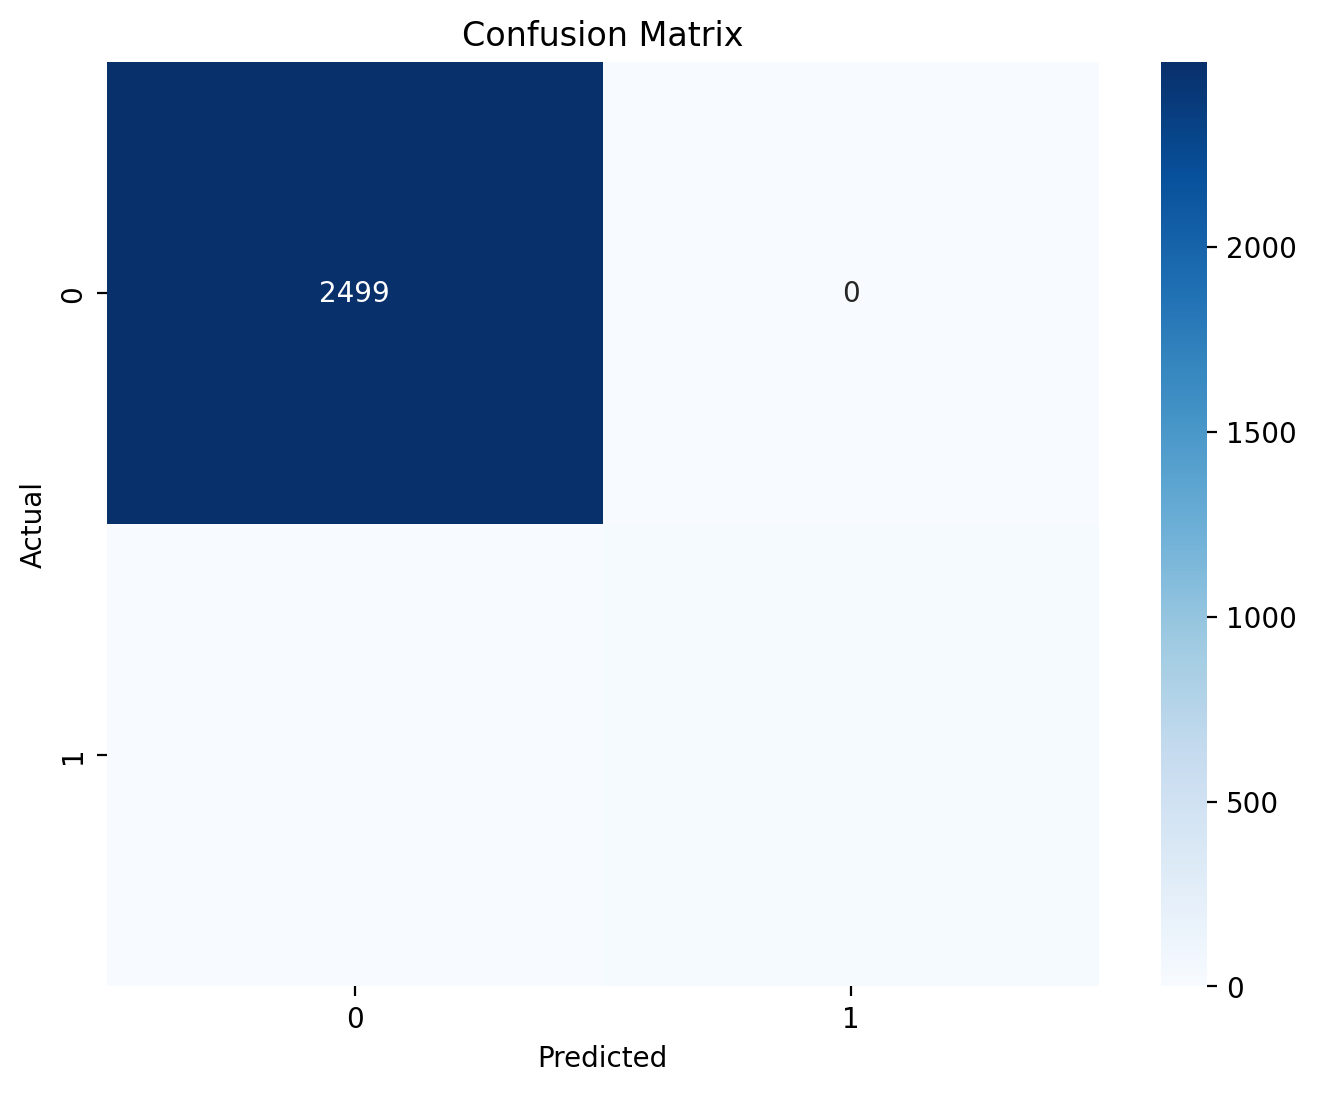

In [195]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have y_test (true labels) and predictions (predicted labels)
confusion_mat = confusion_matrix(y_test, predictions)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## KNN's  

In [175]:
  # Import necessary modules 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 

knn = KNeighborsClassifier(n_neighbors=7) 

knn.fit(X_train, np.ravel(y_train))
  
# Predict on dataset which model has not seen before 
print(knn.predict(X_test)) 

[0 0 0 ... 0 0 0]


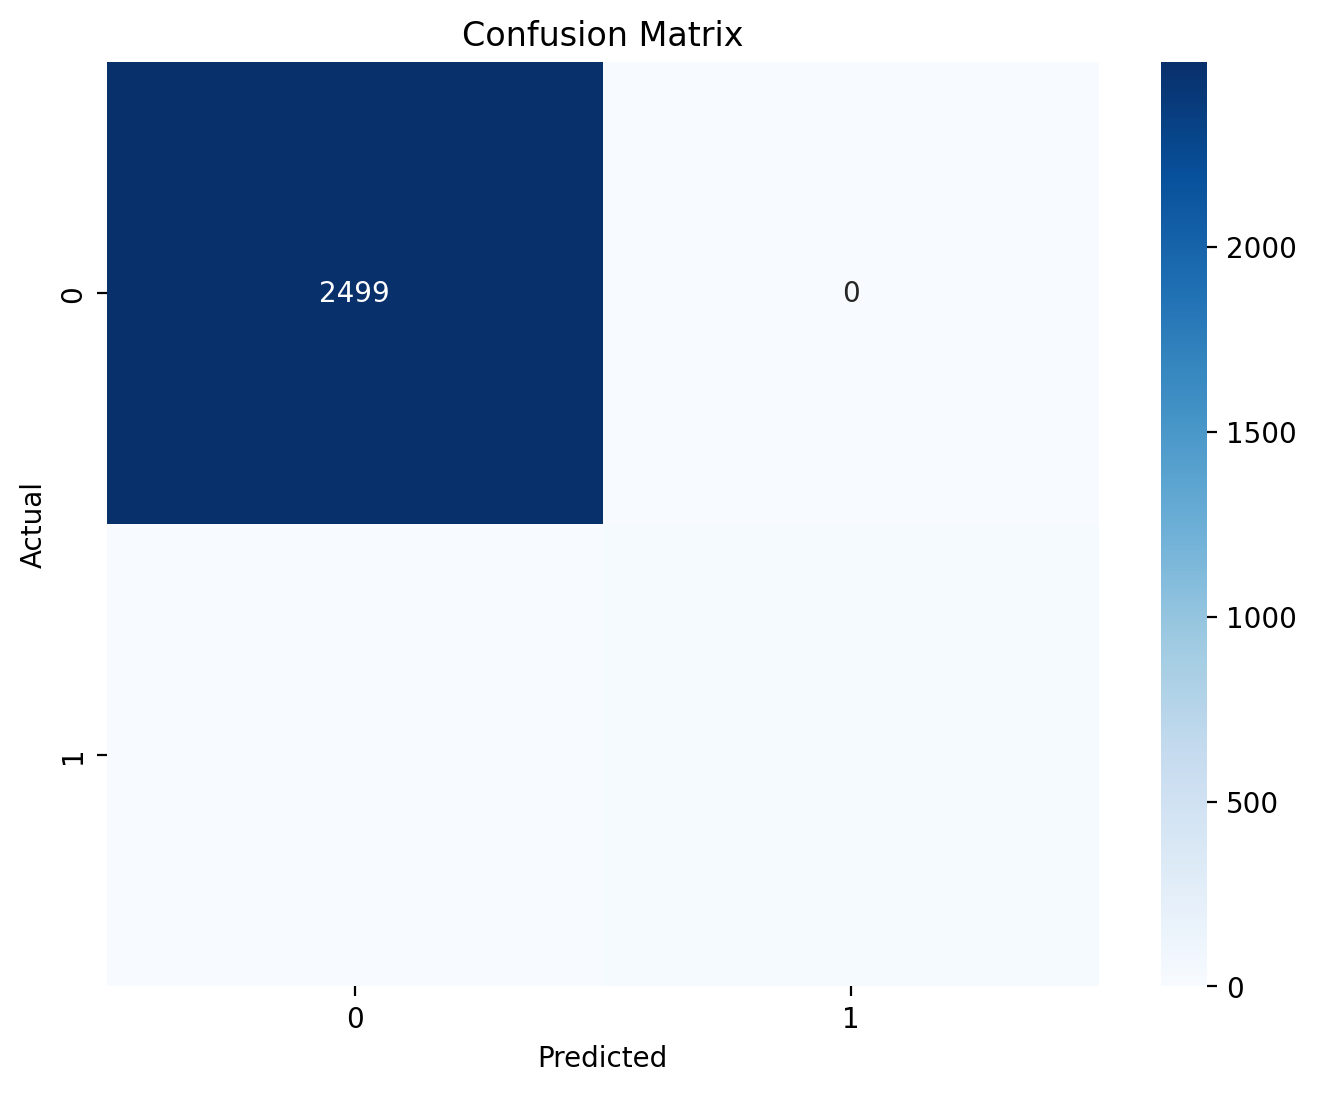

In [178]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Optional - for a nicer visualization


# Get predictions from the model
predictions = knn.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Display the confusion matrix using matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')  # Using seaborn for a heatmap
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Descision tree 

In [181]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, classification_report


# Create and fit the Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
# Make predictions
predictions = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
report = classification_report(y_test, predictions)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2499
           1       1.00      1.00      1.00        20

    accuracy                           1.00      2519
   macro avg       1.00      1.00      1.00      2519
weighted avg       1.00      1.00      1.00      2519



In [ ]:
%%time
# RandomForestClassifier
rf = Pipeline([('rf', RandomForestClassifier(n_estimators = 10, max_depth = 20).fit(X_train, y_train))])
rf_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring="f1")
np.mean(rf_scores)

NameError: name 'Pipeline' is not defined

In [ ]:
# Checking for imbalance
y_test.value_counts()

favorite
0           2499
1             20
Name: count, dtype: int64

In [ ]:
# Building a pipeline to use on regular data
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=30))
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('dt', DecisionTreeClassifier(max_depth=30))])

pipe.score(X_test, y_test)